# Prerequisites

- Python 3.10.4

> Warning: Installation from conda environment may take few minutes

Configuring conda environment

```cmd
conda activate ca2_env
conda install pandas
conda install scikit-learn
```



In [60]:
from preamble import agriculture
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Change default colormap
plt.rcParams["image.cmap"] = "Set2"
sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [61]:
# Datasets
agriculture_df = pd.read_csv("../data/agriculture_dataset.csv")

## Precition of the Gross Value Added for Ireland using CAP key meassurements

X : gross_value_added

# Dimensionality Reduction

### Feature Selection 1: Inferential analysis

Selection #1. Variables that has similar means and variances as detailed during inferential statistics analysis. They are as follows:

ANOVA: Variables and countries similar to Ireland.
```
0	BG	total_subsides_on_field_crops	0.7246195898894956	(BG) Bulgaria
1	SK	prod_cereals_real_price	0.9998980911821606	(SK) Slovakia
```

Kruskal–Wallis
Non parametrical test comparison indicates similar values with Ireland and selected  
Members states ['PT', 'BE', 'DK', 'IE', 'LV', 'LT', 'BG', 'SK'] on the following variables
```
variable	kruskal_test_result
2	compensation_of_employees	0.290062
6	total_subsides_on_field_crops	0.134577
7	rent_paid	0.778948
8	avg_import_idx	0.782263
9	avg_export_idx	0.617945
11	wages_and_salaries	0.720029
14	female_mean_weekly_working_hours	0.134016
16	pct_rented_land_of_uaa	0.064568
17	crop_production_idx	0.416883
```

In [62]:
countries = ['PT', 'BE', 'DK', 'IE', 'LV', 'LT', 'BG', 'SK']
independant_variables_1 = [
    'total_subsides_on_field_crops',
    'prod_cereals_real_price',
    'compensation_of_employees',
    'total_subsides_on_field_crops',
    'rent_paid',
    'avg_import_idx',
    'avg_export_idx',
    'wages_and_salaries',
    'female_mean_weekly_working_hours',
    'pct_rented_land_of_uaa',
    'crop_production_idx',
]

dependant_variable = ["gross_value_added"]
country_var = ["country"]
data = agriculture_df.query("country in @countries")[country_var + independant_variables_1 + dependant_variable]

### Feature Selection 1: Person Correlation
Select variable with positive or negative correlation greater than abs(0.5)

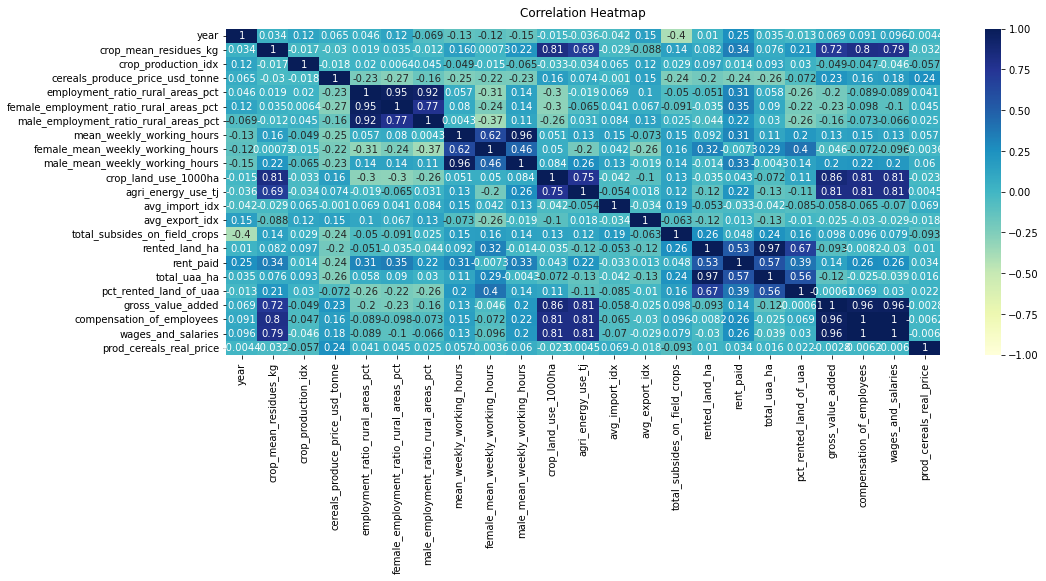

In [63]:
data = agriculture_df
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1, annot=True,  cmap="YlGnBu")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [64]:
gva_corr = data.corr(method='pearson').reset_index().query("index == 'gross_value_added'").melt(id_vars=["index"])

In [65]:
gva_corr.query("value > 0.5 or value < -0.5")[["variable","value"]]

,variable,value
1,crop_mean_residues_kg,0.724757
10,crop_land_use_1000ha,0.861387
11,agri_energy_use_tj,0.806896
19,gross_value_added,1.000000
20,compensation_of_employees,0.960475
21,wages_and_salaries,0.963715


In [66]:
independant_variables_2 = [
    'crop_mean_residues_kg',
    'crop_land_use_1000ha',
    'agri_energy_use_tj',
    'compensation_of_employees',
    'wages_and_salaries'
]

Feature Selection 3: Principal Component Analysis


> PCA is a useful tool to extract features and reduce dataset dimensionality. Consequentially, it helps to
speed up the learning process and to simplify the presentation of the features. Before extracting some features,
it is very important to evaluate the impact of such an operation. In some cases, features can be extracted
without losing too much precision in the data. Although, in some other cases, significant resolution of the data
will be lost


Dessureault, J.-S. and Massicotte, D. (2021) ‘Feature selection or extraction decision process for clustering using PCA and FRSD’. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=edsarx&AN=edsarx.2111.10492&site=eds-live.

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
# Full dataset or only countries relevant to Ireland??
independant_variables_3 = []
for x in list(data.dtypes[data.dtypes == np.float64].index):
    if(x == dependant_variable[0]): 
        continue
    independant_variables_3.append(x)
X = data[independant_variables_3]
y = data[dependant_variable[0]]

In [69]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [71]:
# Create and initialise an object (pca) by calling a method PCA
model = PCA(n_components = 7) # check for 2 or 3

# Transform the data into traning and testing
X_train = model.fit_transform(X_train)
X_test = model.transform(X_test)
 
# Store the explauned variance
explained_variance = model.explained_variance_ratio_

print(explained_variance)

[0.21824498 0.16516603 0.15453621 0.10019191 0.06397854 0.05831242
 0.05167768]


In [72]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = independant_variables_3
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# full list with values
dic = [['PC{}'.format(i), most_important_names[i] ,explained_variance[i]] for i in range(n_pcs)]

# build the dataframe
df = pd.DataFrame(dic,columns=["PC","variable","importance"])

In [73]:
df

,PC,variable,importance
0,PC0,compensation_of_employees,0.218245
1,PC1,total_uaa_ha,0.165166
2,PC2,employment_ratio_rural_areas_pct,0.154536
3,PC3,mean_weekly_working_hours,0.100192
4,PC4,prod_cereals_real_price,0.063979
5,PC5,avg_import_idx,0.058312
6,PC6,avg_export_idx,0.051678


In [74]:
independant_variables_3 = list(df.variable.unique())

In [78]:
independant_variables_1

['total_subsides_on_field_crops',
 'prod_cereals_real_price',
 'compensation_of_employees',
 'total_subsides_on_field_crops',
 'rent_paid',
 'avg_import_idx',
 'avg_export_idx',
 'wages_and_salaries',
 'female_mean_weekly_working_hours',
 'pct_rented_land_of_uaa',
 'crop_production_idx']

In [79]:
independant_variables_2

['crop_mean_residues_kg',
 'crop_land_use_1000ha',
 'agri_energy_use_tj',
 'compensation_of_employees',
 'wages_and_salaries']

In [80]:
independant_variables_3

['compensation_of_employees',
 'total_uaa_ha',
 'employment_ratio_rural_areas_pct',
 'mean_weekly_working_hours',
 'prod_cereals_real_price',
 'avg_import_idx',
 'avg_export_idx']